In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
print("数据挖掘大作业：北京二手房信息，来源于链家网")

数据挖掘大作业：北京二手房信息，来源于链家网


In [3]:
print('加载数据集')
data = pd.read_csv('data/lianjia1.csv', index_col=0,encoding='gbk')
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

加载数据集
属性类别数: 13
总行数: 1556
示例数据:


,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
cjtaoshu,,,,,,,,,,,,,
37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道
37,红莲北里店,257.0,店经理,97% 141,39046元/平,常青藤嘉园 1室1厅 65平,郭海龙,36,房东信赖;销售达人;带看活跃,北/低楼层/16层,签约时间：2015-04-26,4-5年,马连道
37,红莲北里店,243.0,店经理,97% 141,41313元/平,红莲北里 2室1厅 58平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-04-04,4-5年,马连道
37,红莲北里店,372.5,店经理,97% 141,42053元/平,广安门外大街 3室1厅 88平,郭海龙,36,房东信赖;销售达人;带看活跃,东 南 西 北/中楼层/18层,签约时间：2015-04-01,4-5年,马连道


In [4]:
print('提取每一列属性以及名称')
num_fields = data.select_dtypes(include=np.number).columns.values
nom_fields = data.select_dtypes(exclude=np.number).columns.values
print('标称属性:', nom_fields)
print('数值属性:', num_fields)
print(data.shape," ",nom_fields.shape," ",num_fields.shape)

提取每一列属性以及名称
标称属性: ['mendian' 'zhiwei' 'haoping' 'cjdanjia' 'cjxiaoqu' 'xingming' 'biaoqian'
 'cjlouceng' 'cjshijian' 'congyenianxian' 'bankuai']
数值属性: ['cjzongjia' 'cjzhouqi']
(1556, 13)   (11,)   (2,)


In [72]:
print('\nmendian(门店):')
a=data['mendian'].value_counts()
print(a)

print('\nzhiwei(职位):')
b=data['zhiwei'].value_counts()
print(b)

print('\nhaoping(好评):')
c=data['haoping'].value_counts()
print(c)

print('\ncjdanjia(成交单价):')
d=data['cjdanjia'].value_counts()
print(d)

print('\nxingming(姓名):')
e=data['xingming'].value_counts()
print(e)

print('\nbiaoqian(标签):')
f=data['biaoqian'].value_counts()
print(f)

print('\ncjlouceng(成交楼层):')
g=data['cjlouceng'].value_counts()
print(g)

print('\ncjshijian(成交时间):')
h=data['cjshijian'].value_counts()
print(h)

print('\ncongyenianxian(从月年限):')
i=data['congyenianxian'].value_counts()
print(i)

print('\nbankuai(板块):')
j=data['bankuai'].value_counts()
print(j)


mendian(门店):
老山旗舰店        78
皂君东里店        51
光彩路一店        50
永乐店          45
苹果店          45
东风北桥店        40
日坛国际店        40
阳光花园店        40
月华轩店         40
新建欣苑店        40
白家庄小学店       40
融景城店         40
马坡店          40
太东店          40
新武夷花园店       40
首开常青藤店       40
二里庄南店        40
华清嘉园新店       40
团结湖店         40
安德路店         40
苹果园大街店       40
莲香园店         40
乐成豪丽店        40
富力又一城四临时店    40
南方庄店         40
新城中心店        38
龙跃店          37
红莲北里店        37
华尔街店         37
银河大街店        37
裕民路店         36
逸成东苑店        35
朝内小街店        35
马连道中里店       34
定慧福里店        34
新街口西里一区店     33
金尚嘉园店        26
龙泽城铁店        26
志新店          24
交东小区店        18
Name: mendian, dtype: int64

zhiwei(职位):
店经理    1385
经纪人     171
Name: zhiwei, dtype: int64

haoping(好评):
94% 281     82
95% 414     78
97% 220     51
95% 218     50
91% 211     45
95% 253     40
90% 193     40
93% 117     40
98% 183     40
96% 151     40
94% 204     40
96% 303     40
97% 204     40
92% 193     40
98% 177     40
93% 271     40


In [5]:
print('展示每一属性的5数统计(只对数值进行统计)：')

展示每一属性的5数统计(只对数值进行统计)：


In [6]:
data['danjia'],_=data['cjdanjia'].str.split('元').str
data['danjia']=data['danjia'].astype(int)
data.describe()

,cjzongjia,cjzhouqi,danjia
count,1556.000000,1556.000000,1556.000000
mean,328.791583,47.701157,40784.397172
std,189.891435,13.805261,17748.333829
min,0.000000,19.000000,0.000000
25%,200.000000,40.000000,29175.500000
50%,282.750000,45.000000,37690.500000
75%,405.000000,55.000000,49783.000000
max,1560.000000,80.000000,115221.000000


In [7]:
print('对上面的数值属性进行缺失值统计：\n')
print('cjzongjia:',data['cjzongjia'].isnull().sum())
print('cjzhouqi:',data['cjzhouqi'].isnull().sum())
print('danjia:',data['danjia'].isnull().sum())

对上面的数值属性进行缺失值统计：

cjzongjia: 0
cjzhouqi: 0
danjia: 0


In [8]:
data.head(5)

,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai,danjia
cjtaoshu,,,,,,,,,,,,,,
37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道,43997
37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道,36969
37,红莲北里店,257.0,店经理,97% 141,39046元/平,常青藤嘉园 1室1厅 65平,郭海龙,36,房东信赖;销售达人;带看活跃,北/低楼层/16层,签约时间：2015-04-26,4-5年,马连道,39046
37,红莲北里店,243.0,店经理,97% 141,41313元/平,红莲北里 2室1厅 58平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-04-04,4-5年,马连道,41313
37,红莲北里店,372.5,店经理,97% 141,42053元/平,广安门外大街 3室1厅 88平,郭海龙,36,房东信赖;销售达人;带看活跃,东 南 西 北/中楼层/18层,签约时间：2015-04-01,4-5年,马连道,42053


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
数据可视化：

数据太多导致显示数据出现重叠看不清具体值，所以取前20个为例:
cjzongjia前20个样例:


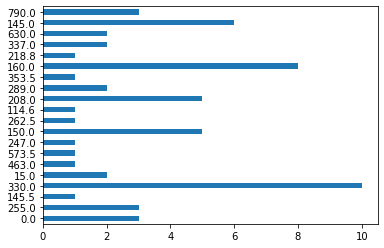

cjzhouqi前20个样例:


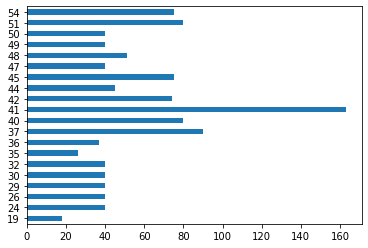

danjia前20个样例:


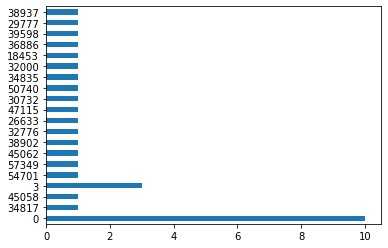

In [9]:
print('数据可视化：\n')
field = ['cjzongjia','cjzhouqi','danjia']
print('数据太多导致显示数据出现重叠看不清具体值，所以取前20个为例:')

for fie in field:
    print("{}前20个样例:".format(fie))
    data[fie].value_counts(sort=False).head(20).plot.barh()
    plt.show()

画出不同店家的成交数量饼图


<AxesSubplot:ylabel='mendian'>

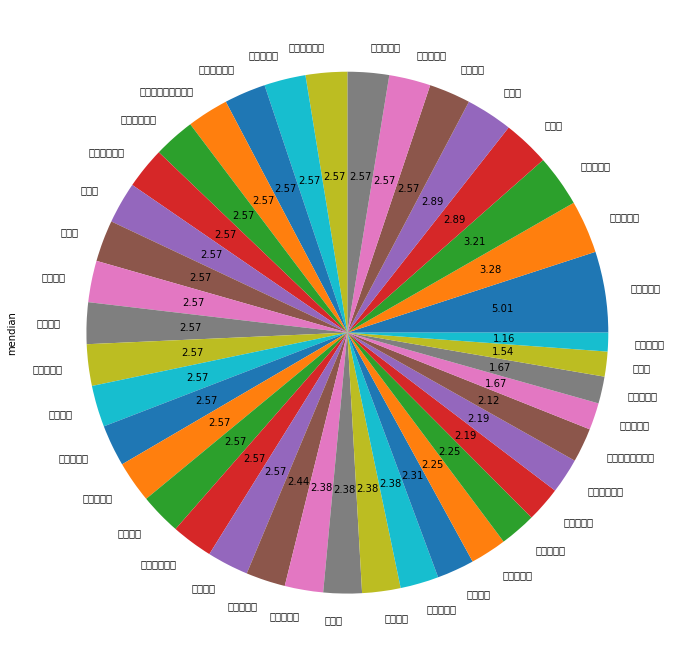

In [10]:
print("画出不同店家的成交数量饼图")
label=[]
for key in data['mendian'].value_counts().index:
    label.append(key)

data['mendian'].value_counts().plot.pie(labels=label, 
                 autopct='%.2f', fontsize=10,figsize=(12, 12))

画出不同从月年限的饼图


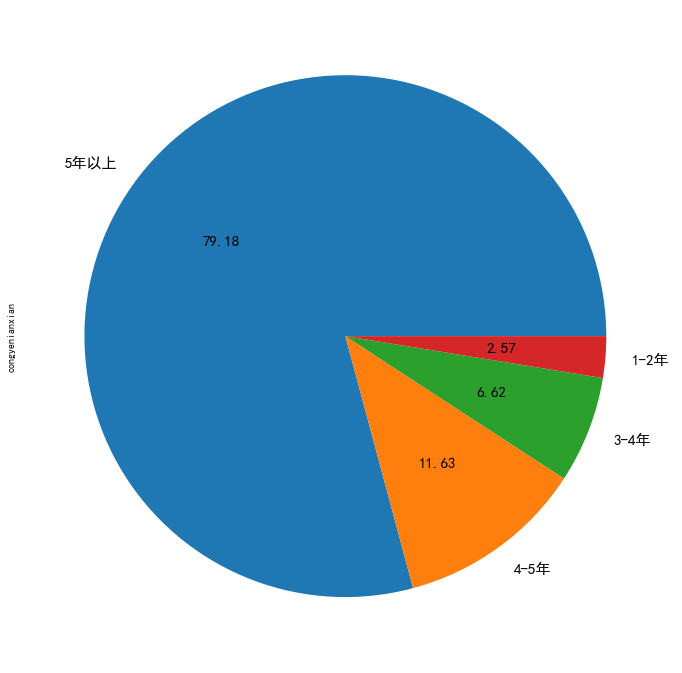

In [83]:
print("画出不同从月年限的饼图")
label=[]
for key in data['congyenianxian'].value_counts().index:
    label.append(key)

data['congyenianxian'].value_counts().plot.pie(labels=label, 
                 autopct='%.2f', fontsize=15,figsize=(12, 12))

画出不同板块（地区）的饼图


<AxesSubplot:ylabel='bankuai'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


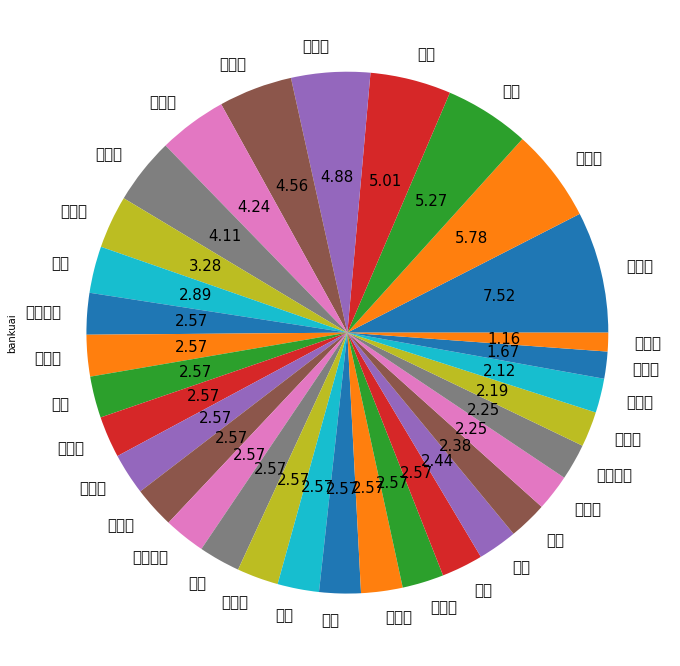

In [11]:
print("画出不同板块（地区）的饼图")
label=[]
for key in data['bankuai'].value_counts().index:
    label.append(key)

data['bankuai'].value_counts().plot.pie(labels=label, 
                 autopct='%.2f', fontsize=15,figsize=(12, 12))

画出不同标签的饼图


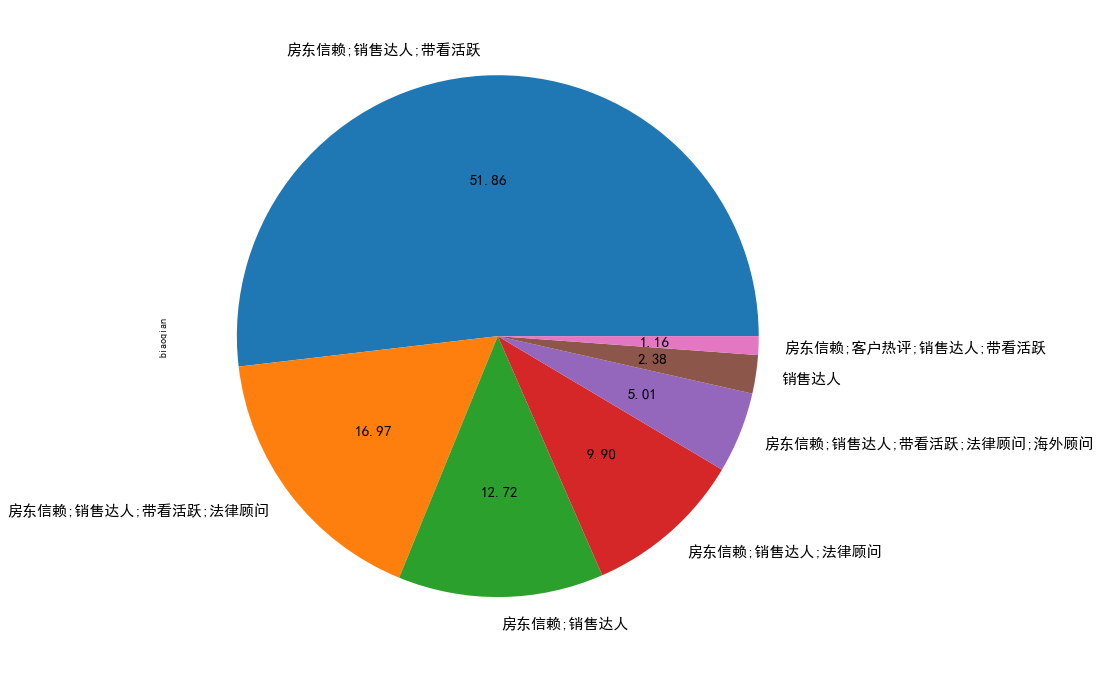

In [89]:
print("画出不同标签的饼图")
label=[]
for key in data['biaoqian'].value_counts().index:
    label.append(key)

data['biaoqian'].value_counts().plot.pie(labels=label, 
                 autopct='%.2f', fontsize=15,figsize=(12, 12))